In [47]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
root = '/Users/schwalmdaniel/github/kaggle/keras'

train_path = root + '/train2'
valid_path = root + '/valid2'
test_path = root + '/test2'

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)

Found 114 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [49]:
vgg16_model = keras.applications.vgg16.VGG16()

model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)
    
model.layers.pop()

for layer in model.layers:
    layer.trainable = False
    
model.add(Dense(2, activation='softmax'))

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(train_batches, steps_per_epoch=11, 
                    validation_data=valid_batches, validation_steps=5, epochs=10, verbose=2)

Epoch 1/20
 - 90s - loss: 0.6820 - acc: 0.6976 - val_loss: 0.6759 - val_acc: 0.8542
Epoch 2/20
 - 90s - loss: 0.6663 - acc: 0.9455 - val_loss: 0.6681 - val_acc: 0.8750
Epoch 3/20
 - 83s - loss: 0.6602 - acc: 0.9599 - val_loss: 0.6624 - val_acc: 0.8750
Epoch 4/20
 - 83s - loss: 0.6516 - acc: 0.9726 - val_loss: 0.6582 - val_acc: 0.9167
Epoch 5/20
 - 89s - loss: 0.6447 - acc: 1.0000 - val_loss: 0.6534 - val_acc: 0.9167
Epoch 6/20
 - 82s - loss: 0.6350 - acc: 1.0000 - val_loss: 0.6494 - val_acc: 0.8958
Epoch 7/20
 - 79s - loss: 0.6301 - acc: 1.0000 - val_loss: 0.6462 - val_acc: 0.8542
Epoch 8/20
 - 90s - loss: 0.6276 - acc: 1.0000 - val_loss: 0.6420 - val_acc: 0.8750
Epoch 9/20
 - 88s - loss: 0.6228 - acc: 1.0000 - val_loss: 0.6390 - val_acc: 0.8958
Epoch 10/20
 - 79s - loss: 0.6210 - acc: 1.0000 - val_loss: 0.6365 - val_acc: 0.8750
Epoch 11/20
 - 80s - loss: 0.6177 - acc: 1.0000 - val_loss: 0.6342 - val_acc: 0.8750
Epoch 12/20
 - 80s - loss: 0.6158 - acc: 1.0000 - val_loss: 0.6322 - val_a

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)

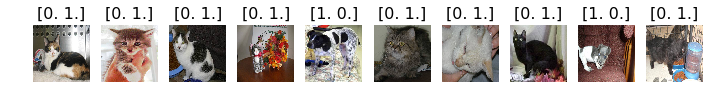

In [58]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

test_labels = test_labels[:,0]
test_labels

In [59]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

Confusion matrix, without normalization
[[5 3]
 [1 1]]


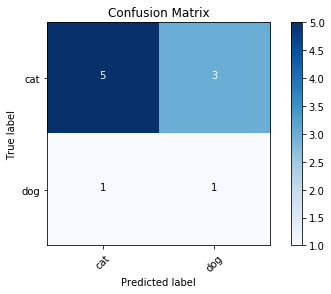

In [60]:
cm = confusion_matrix(test_labels, np.round(predictions)[:,0])

cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')